<a href="https://colab.research.google.com/github/profugohenrique/spoincd/blob/master/INCD27_09AAnscombe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# O quarteto de Anscombe compreende quatro conjuntos de dados que têm estatísticas descritivas simples quase idênticas ,
#bmas têm distribuições muito diferentes e parecem muito diferentes quando representados graficamente .
# Cada conjunto de dados consiste em onze pontos ( x ,  y ) . Eles foram construídos em 1973 pelo estatístico
# Francis Anscombe para demonstrar a importância de representar graficamente os dados ao analisá-los e o
# efeito de outliers e outras observações influentes nas propriedades estatísticas. Ele descreveu o artigo como tendo a intenção
#de contrariar a impressão entre os estatísticos de que "cálculos numéricos são exatos, mas gráficos são grosseiros"


# ===============================================
#  Aula Prática: Análise Exploratória de Dados
# Dataset: Anscombe (Seaborn)
# ===============================================

# 🔹 Imports principais
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7,5)

# ===============================================
# 1. Carregar o dataset Anscombe
# ===============================================
anscombe = sns.load_dataset("anscombe")
anscombe.head()


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [ ]:
# ===============================================
# 2. Estrutura e estatísticas descritivas
# ===============================================

# Ver primeiros registros
print("Dimensões do dataset:", anscombe.shape)
print(anscombe.info())

# Estatísticas por dataset (I, II, III, IV)
desc = anscombe.groupby("dataset").describe()
desc


Dimensões do dataset: (44, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB
None


x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

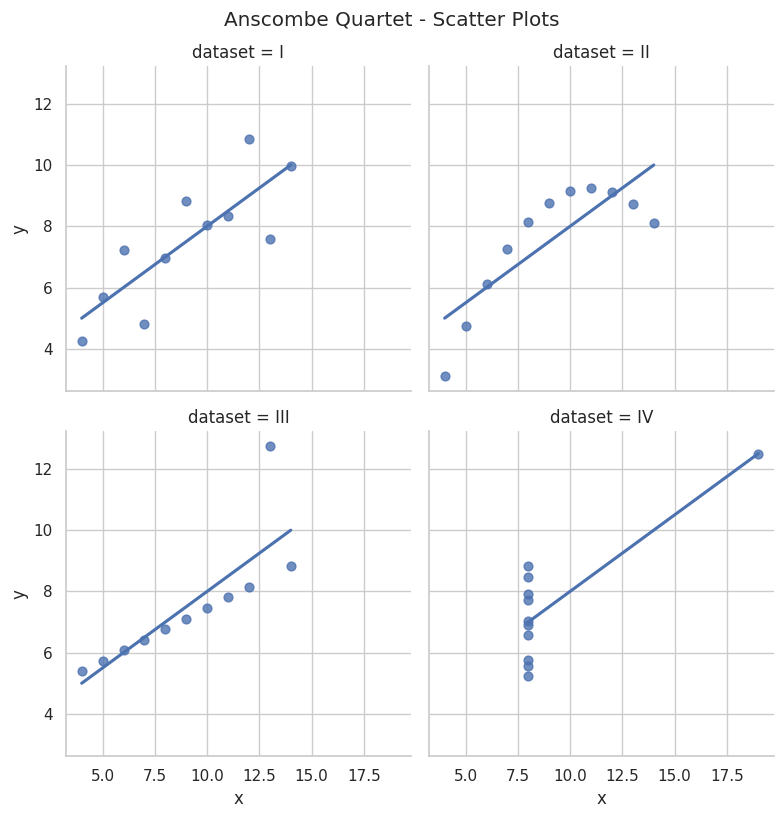

In [ ]:
# ===============================================
# 3. Visualização dos grupos
# ===============================================

# Dispersão por grupo
sns.lmplot(x="x", y="y", col="dataset", data=anscombe,
           col_wrap=2, ci=None, palette="muted",
           height=4, scatter_kws={"s":40, "alpha":0.8})
plt.suptitle("Anscombe Quartet - Scatter Plots", y=1.02)
plt.show()


In [ ]:
# ===============================================
# 4. Comparando médias e variâncias
# ===============================================

# Média e variância de cada dataset
summary = anscombe.groupby("dataset").agg({
    "x": ["mean", "var"],
    "y": ["mean", "var"]
})
summary


x               y          
        mean   var      mean       var
dataset                               
I        9.0  11.0  7.500909  4.127269
II       9.0  11.0  7.500909  4.127629
III      9.0  11.0  7.500000  4.122620
IV       9.0  11.0  7.500909  4.123249

In [ ]:
# ===============================================
# 5. Correlação
# ===============================================

corrs = anscombe.groupby("dataset").apply(lambda g: g["x"].corr(g["y"]))
print("Correlação entre x e y por dataset:")
print(corrs)


Correlação entre x e y por dataset:
dataset
I      0.816421
II     0.816237
III    0.816287
IV     0.816521
dtype: float64


/tmp/ipython-input-3457796888.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs = anscombe.groupby("dataset").apply(lambda g: g["x"].corr(g["y"]))


In [ ]:
# ===============================================
# 6. Atividade para os alunos
# ===============================================
# 1. Reproduzam estatísticas descritivas para cada dataset (média, mediana, variância)
# 2. Criem boxplots para x e y por dataset
# 3. Explorem o que aconteceria se ajustassem uma regressão linear em cada grupo
# 4. Escrevam conclusões: por que não basta olhar só estatísticas?


In [ ]:
# Estatísticas por dataset (1)
stats_summary = anscombe.groupby("dataset").agg({
    "x": ["mean", "median", "var"],
    "y": ["mean", "median", "var"]
}).round(2)

stats_summary


x                 y             
        mean median   var mean median   var
dataset                                    
I        9.0    9.0  11.0  7.5   7.58  4.13
II       9.0    9.0  11.0  7.5   8.14  4.13
III      9.0    9.0  11.0  7.5   7.11  4.12
IV       9.0    8.0  11.0  7.5   7.04  4.12

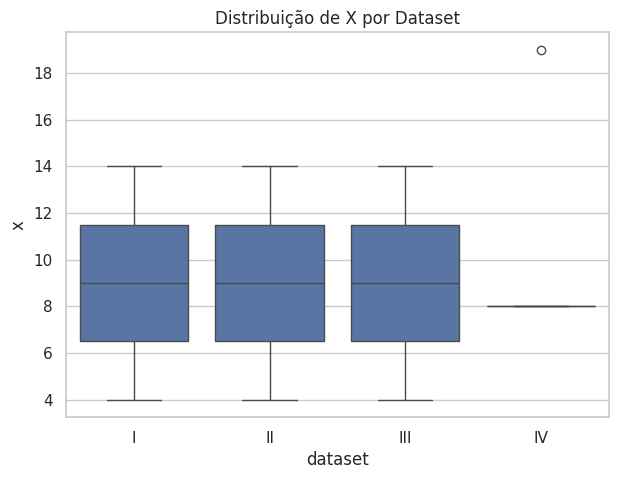

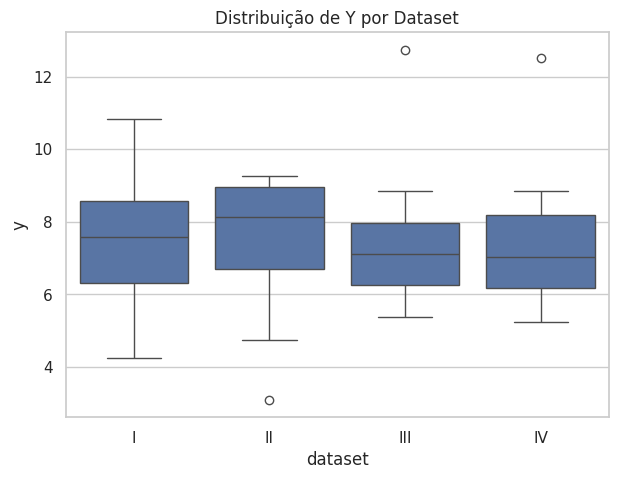

In [ ]:
# Boxplot para variável x (2)
sns.boxplot(x="dataset", y="x", data=anscombe)
plt.title("Distribuição de X por Dataset")
plt.show()

# Boxplot para variável y
sns.boxplot(x="dataset", y="y", data=anscombe)
plt.title("Distribuição de Y por Dataset")
plt.show()


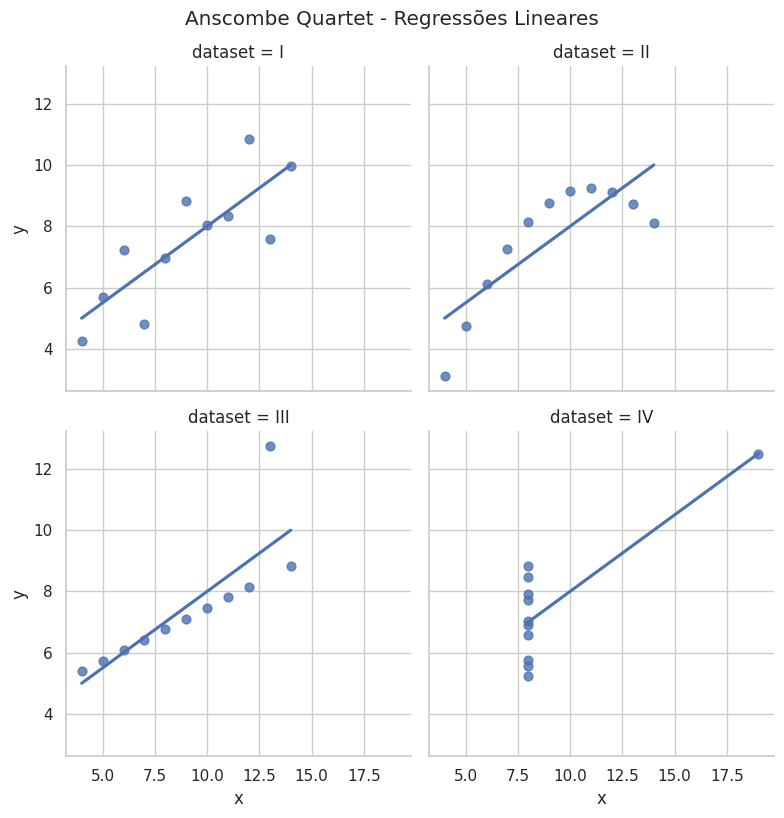

In [ ]:
# Ajustando regressões lineares por grupo (3)
sns.lmplot(x="x", y="y", col="dataset", data=anscombe,
           col_wrap=2, ci=None, palette="muted",
           height=4, scatter_kws={"s":40, "alpha":0.8})
plt.suptitle("Anscombe Quartet - Regressões Lineares", y=1.02)
plt.show()
